In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


## Set model and resolution parameters

In [2]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)
res0 = 0.5
res1 = 0.8




## Plots to visualize these parameter choices

In [3]:
ngen = 100000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

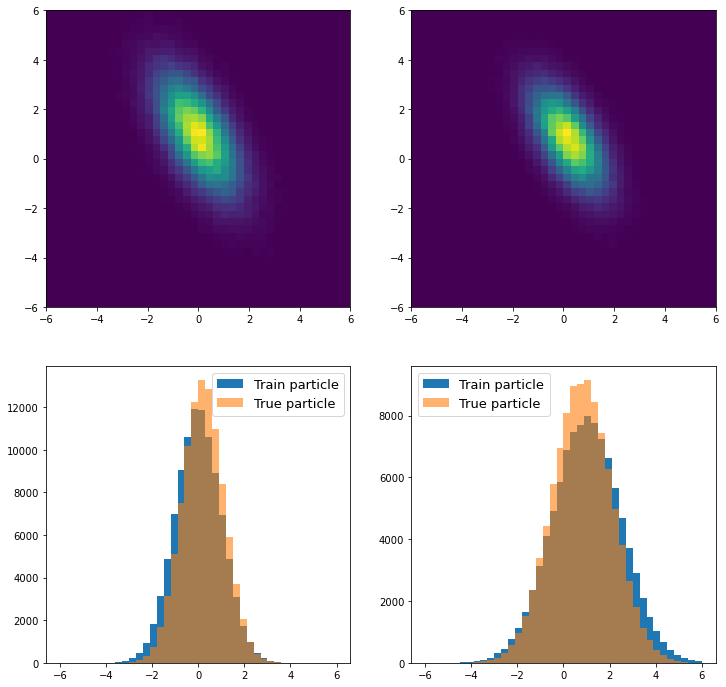

In [4]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [5]:
train_diff = train_det_pts - train_pts

In [6]:
diff_cov = np.cov( train_diff.T )

In [7]:
diff_cov

array([[ 0.24959204, -0.00184832],
       [-0.00184832,  0.64129074]])

In [8]:
np.sqrt(diff_cov[0,0])

0.49959186884350953

In [9]:
np.sqrt(diff_cov[1,1])

0.8008063059390478

<function matplotlib.pyplot.show(close=None, block=None)>

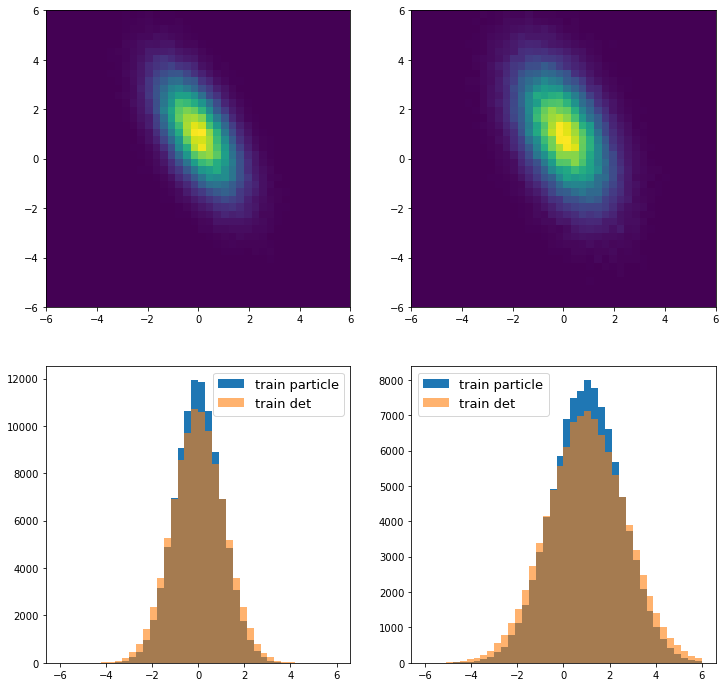

In [10]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

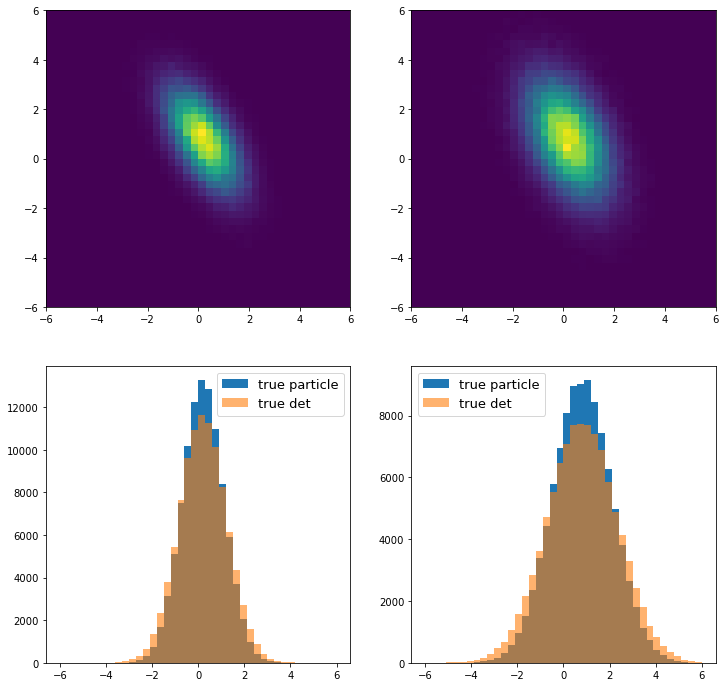

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

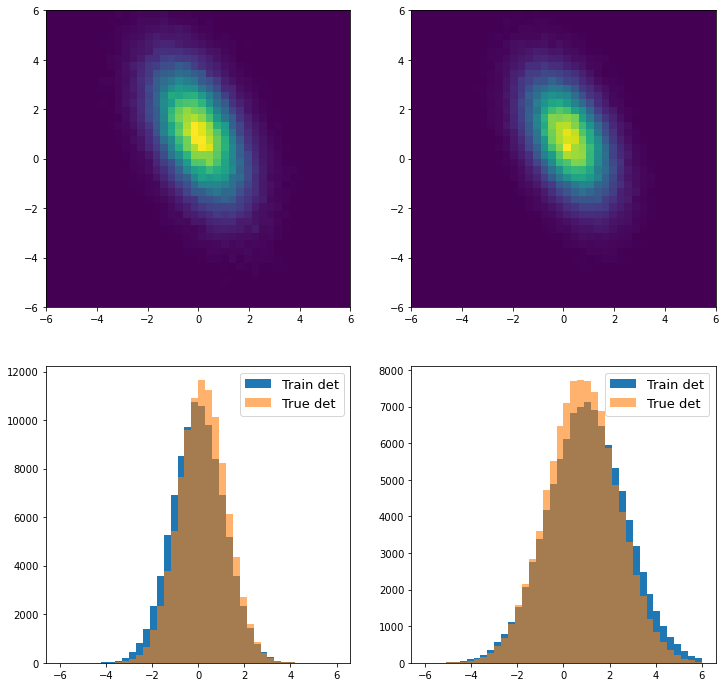

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [13]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

2023-10-25 12:51:30.292808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 12:51:30.293033: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 12:51:30.310001: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 12:51:30.310271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 12:51:30.310441: I tensorflow/compiler/xla/stream_executo

## Package the training data for OmniFold

In [14]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [15]:
%%time


verbose = True

of_niter = 6

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)


ITERATION: 1

   -- ITERATION 1  STEP 1

Epoch 1/20


2023-10-25 12:51:32.320678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-25 12:51:32.322639: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7efb7410c380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-25 12:51:32.322651: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-25 12:51:32.322654: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-25 12:51:32.325961: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-25 12:51:32.410752: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is log

15/15 [==============================] - 2s 13ms/step - loss: 0.6925 - accuracy: 0.5142 - val_loss: 0.6886 - val_accuracy: 0.4920
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5214 - val_loss: 0.6872 - val_accuracy: 0.4914
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5118 - val_loss: 0.6864 - val_accuracy: 0.5273
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5338 - val_loss: 0.6858 - val_accuracy: 0.5688
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5605 - val_loss: 0.6855 - val_accuracy: 0.5750
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5773 - val_loss: 0.6854 - val_accuracy: 0.5723
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5803 - val_loss: 0.6855 - val_accuracy: 0.5648
Epoch 8/20
15/15 [============

15/15 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.4427 - val_loss: 0.6880 - val_accuracy: 0.4477
Epoch 19/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.4397 - val_loss: 0.6880 - val_accuracy: 0.4446
Epoch 20/20
10/10 [==============================] - 0s 612us/step

   -- ITERATION 2  STEP 2

Epoch 1/20
75/75 [==============================] - 1s 4ms/step - loss: 0.6808 - accuracy: 0.3805 - val_loss: 0.6788 - val_accuracy: 0.3887
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.3901 - val_loss: 0.6788 - val_accuracy: 0.3914
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.3905 - val_loss: 0.6790 - val_accuracy: 0.3828
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.3887 - val_loss: 0.6789 - val_accuracy: 0.3921
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6

75/75 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.3925 - val_loss: 0.6833 - val_accuracy: 0.3883
Epoch 15/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.3939 - val_loss: 0.6832 - val_accuracy: 0.3904
Epoch 16/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.3911 - val_loss: 0.6832 - val_accuracy: 0.3889
Epoch 17/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.3916 - val_loss: 0.6832 - val_accuracy: 0.3961
Epoch 18/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.3940 - val_loss: 0.6833 - val_accuracy: 0.3875
Epoch 19/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.3932 - val_loss: 0.6831 - val_accuracy: 0.3923
Epoch 20/20
10/10 [==============================] - 0s 662us/step

ITERATION: 4

   -- ITERATION 4  STEP 1

Epoch 1/20
15/15 [==============================] - 1s 11

15/15 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.3161 - val_loss: 0.7003 - val_accuracy: 0.3040
Epoch 11/20
15/15 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.2973 - val_loss: 0.7003 - val_accuracy: 0.2973
Epoch 12/20
15/15 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.3180 - val_loss: 0.7003 - val_accuracy: 0.3139
Epoch 13/20
15/15 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.2939 - val_loss: 0.7003 - val_accuracy: 0.3084
Epoch 14/20
15/15 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.3106 - val_loss: 0.7003 - val_accuracy: 0.3162
Epoch 15/20
15/15 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.3165 - val_loss: 0.7003 - val_accuracy: 0.3060
Epoch 16/20
15/15 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.3056 - val_loss: 0.7003 - val_accuracy: 0.3104
Epoch 17/20
15/15 [======

75/75 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.3904 - val_loss: 0.6817 - val_accuracy: 0.3897
Epoch 7/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.3899 - val_loss: 0.6817 - val_accuracy: 0.3920
Epoch 8/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.3913 - val_loss: 0.6817 - val_accuracy: 0.3938
Epoch 9/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.3916 - val_loss: 0.6817 - val_accuracy: 0.3914
Epoch 10/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.3912 - val_loss: 0.6817 - val_accuracy: 0.3933
Epoch 11/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.3913 - val_loss: 0.6817 - val_accuracy: 0.3907
Epoch 12/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.3924 - val_loss: 0.6819 - val_accuracy: 0.3849
Epoch 13/20
75/75 [=========

In [16]:
of_weights

array([[[1.25043178, 1.00905323, 0.75240839, ..., 1.25537264,
         1.13202071, 0.932684  ],
        [1.22691405, 0.96125233, 0.8109464 , ..., 1.18584228,
         1.17705119, 0.98006105]],

       [[1.30680931, 0.99624819, 0.74327338, ..., 1.24444687,
         1.23105776, 0.99370801],
        [1.23726428, 0.95716095, 0.72466636, ..., 1.24719346,
         1.24480033, 0.99326694]],

       [[1.29719353, 0.99300271, 0.69171149, ..., 1.31004143,
         1.28331828, 1.01714635],
        [1.23931193, 0.98798299, 0.70686907, ..., 1.26882887,
         1.28558099, 1.04981387]],

       [[1.2621479 , 0.98449707, 0.66381919, ..., 1.28702104,
         1.26976991, 1.03553998],
        [1.28147364, 0.97645581, 0.64595646, ..., 1.29706311,
         1.30025184, 1.03844845]],

       [[1.27329767, 0.97345793, 0.63621461, ..., 1.30039895,
         1.29353178, 1.03150868],
        [1.25797665, 0.93958759, 0.60319424, ..., 1.27745128,
         1.30214536, 1.01335931]],

       [[1.25995255, 0.9557480

In [17]:
np.shape( of_weights)

(6, 2, 100000)

<function matplotlib.pyplot.show(close=None, block=None)>

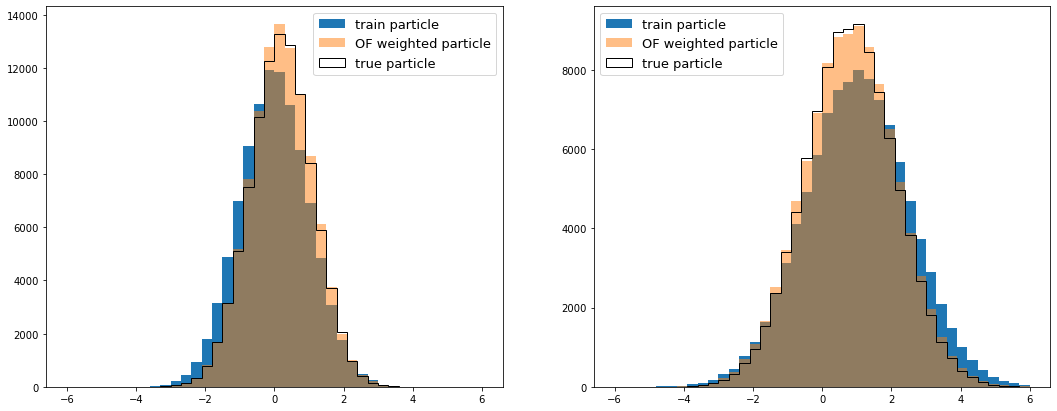

In [18]:
fig,ax = plt.subplots( 1, 2, figsize=(18,7))

hmin=-6
hmax=6
hbins=40



ax[0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[0].hist( train_pts[:,0], weights=of_weights[3,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
ax[0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

ax[1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1].hist( train_pts[:,1], weights=of_weights[3,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
ax[1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )


ax[0].legend(loc='best', fontsize=13)
ax[1].legend(loc='best', fontsize=13)



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

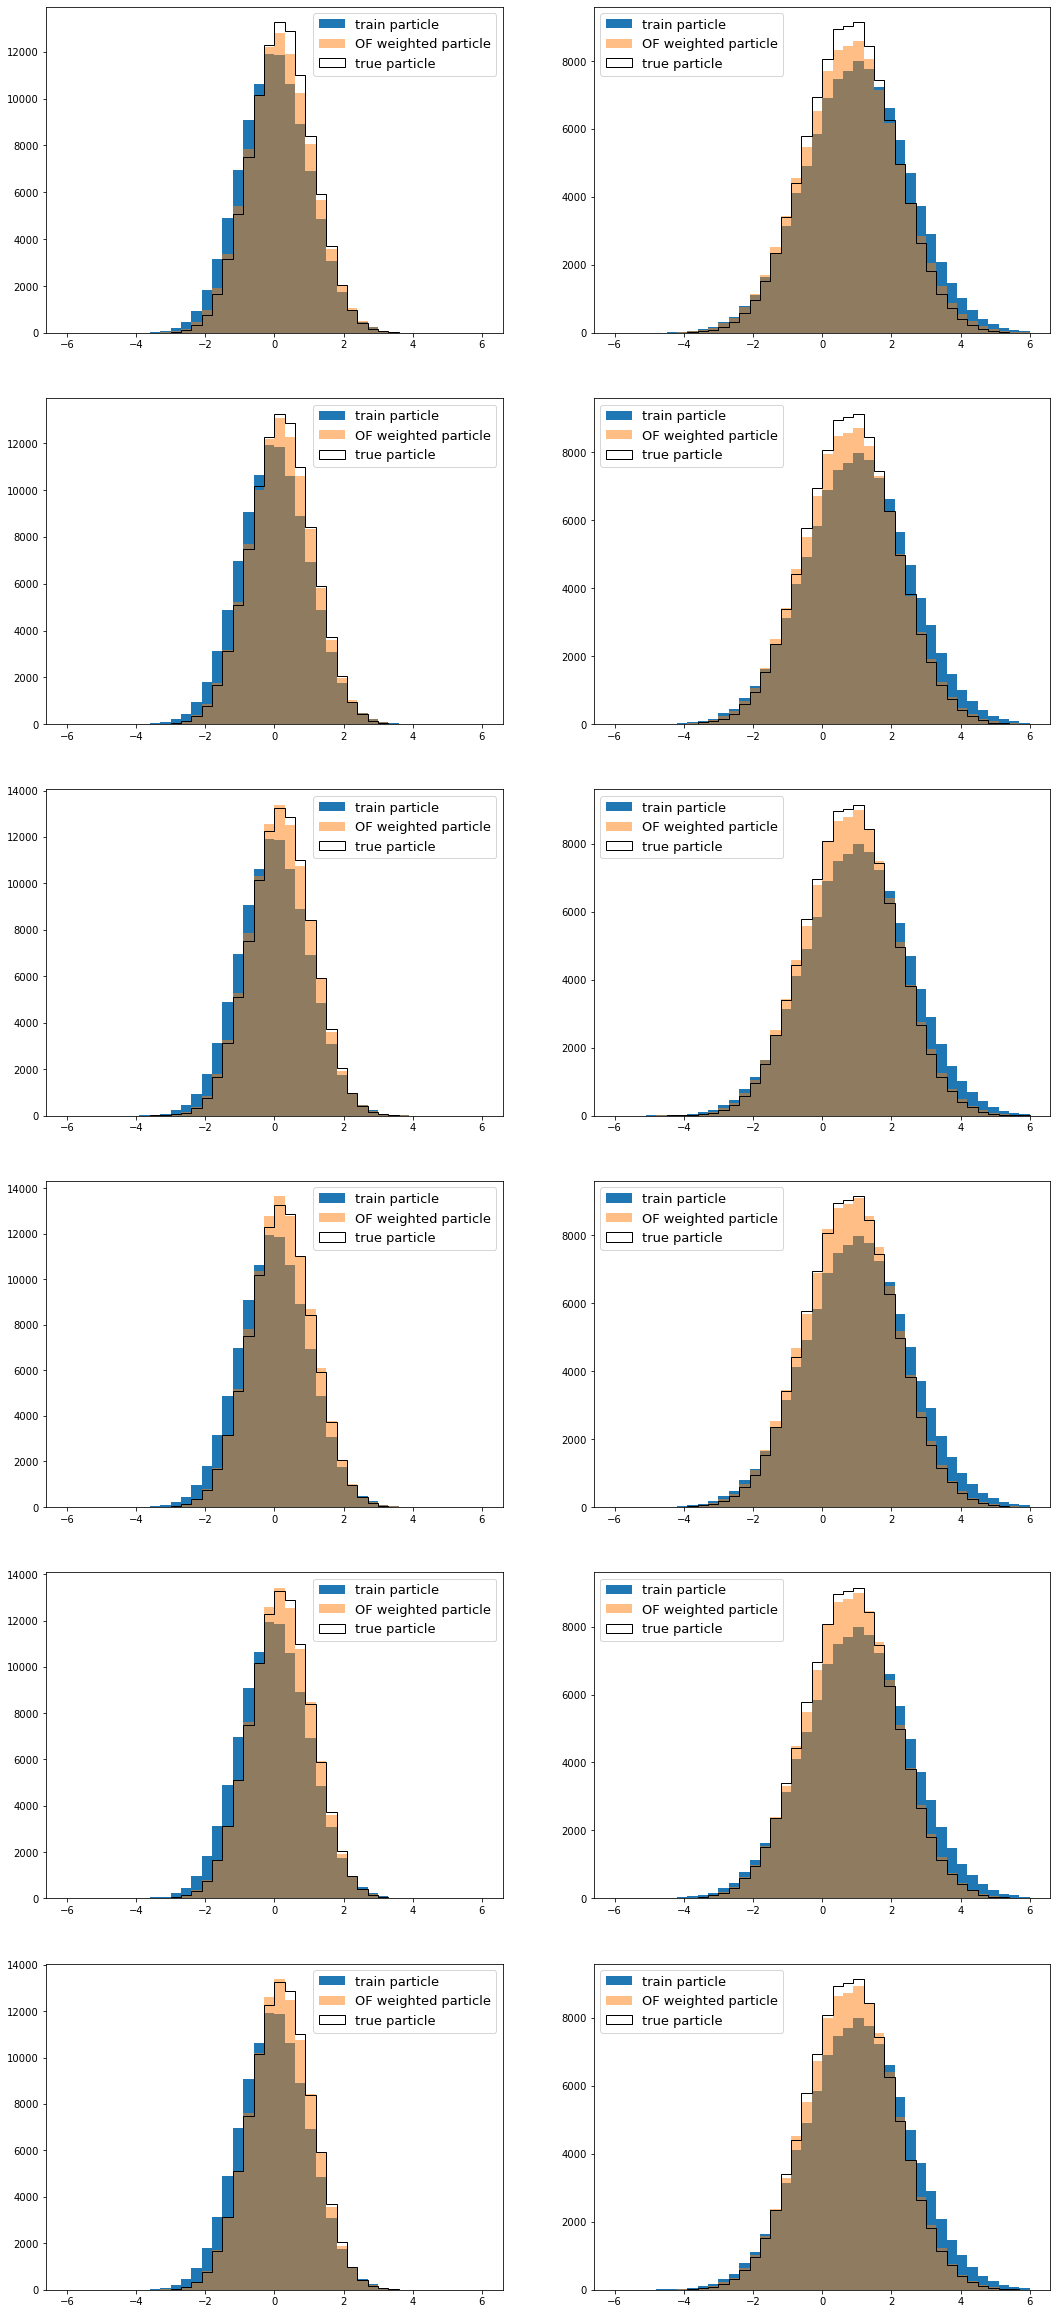

In [19]:


fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

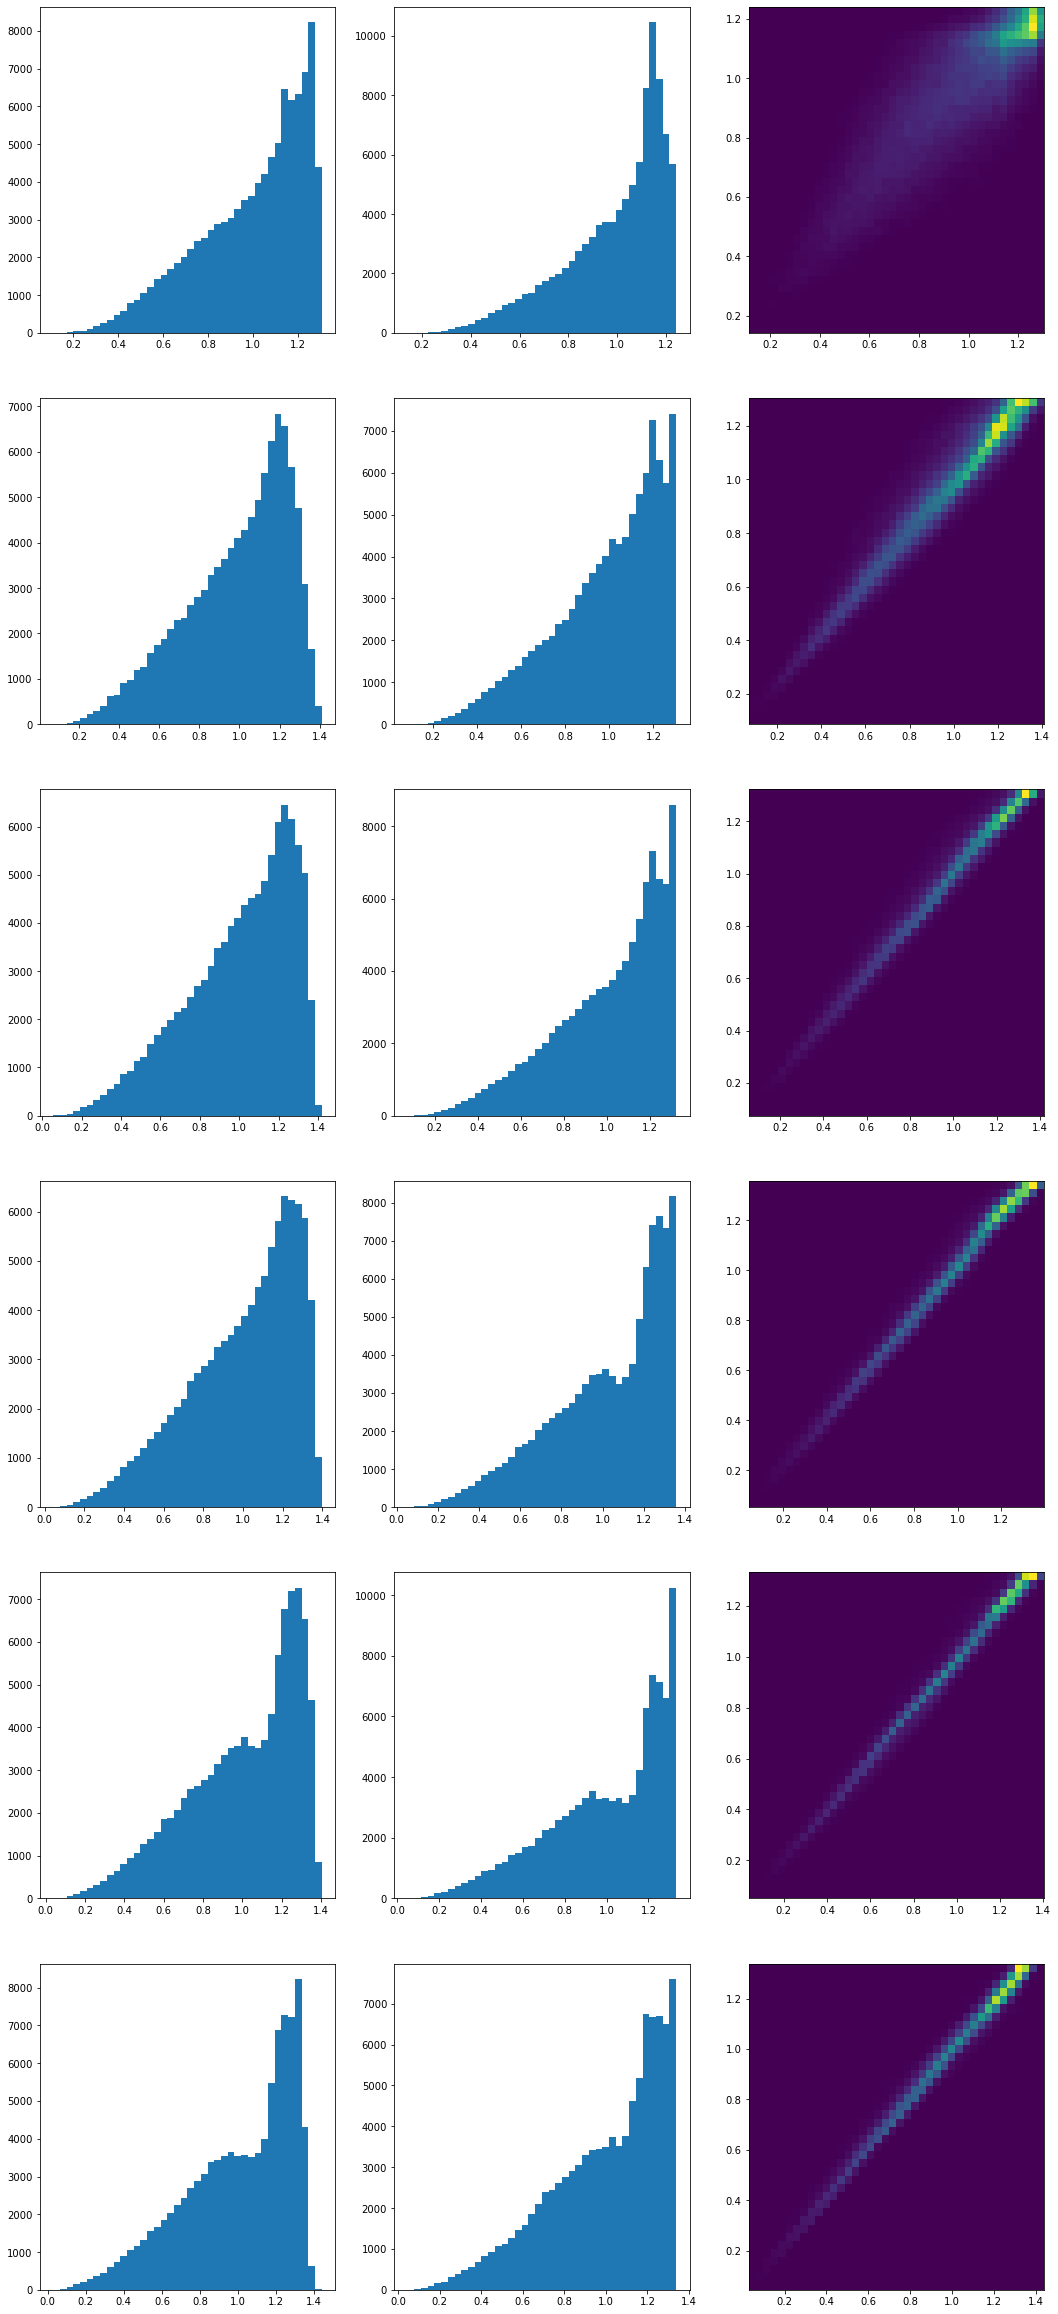

In [20]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins )
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

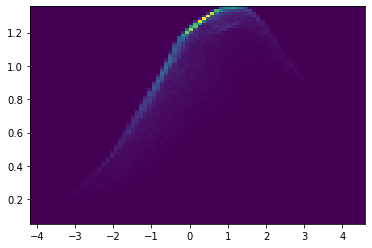

In [21]:
plt.hist2d( train_pts[:,0], of_weights[3,1,:], bins=[80,80])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

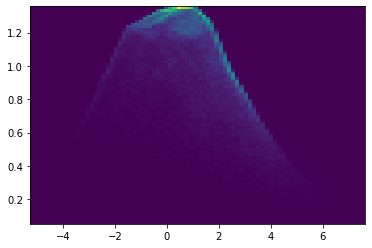

In [22]:
plt.hist2d( train_pts[:,1], of_weights[3,1,:], bins=[80,80])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

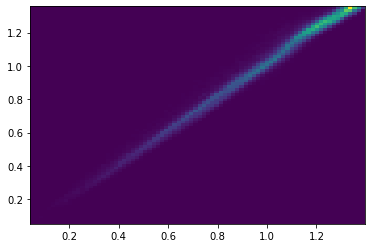

In [23]:
plt.hist2d( of_weights[3,0,:], of_weights[3,1,:], bins=[80,80])
plt.show